<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
## Write your code here
missing_data = df[['Employment', 'JobSat', 'RemoteWork']].isna().sum()
missing_data.head()

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1': '0.5','More than 50': '51'})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

def map_experience(years):
    if pd.isna(years):
        return 'Unknown'
    elif years <= 1:
        return 'Beginner'
    elif years <= 5:
        return 'Intermediate'
    elif years <= 10:
        return 'Experienced'
    else:
        return 'Expert'

df['ExperienceLevel'] = df['YearsCodePro'].apply(map_experience)

print(df[['YearsCodePro', 'ExperienceLevel']].head(10))

   YearsCodePro ExperienceLevel
0           NaN         Unknown
1          17.0          Expert
2          27.0          Expert
3           NaN         Unknown
4           NaN         Unknown
5           NaN         Unknown
6           7.0     Experienced
7           NaN         Unknown
8           NaN         Unknown
9          11.0          Expert


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\HP\AppData\Local\Temp\ipykernel_20496\3406671306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Number of Respondents')

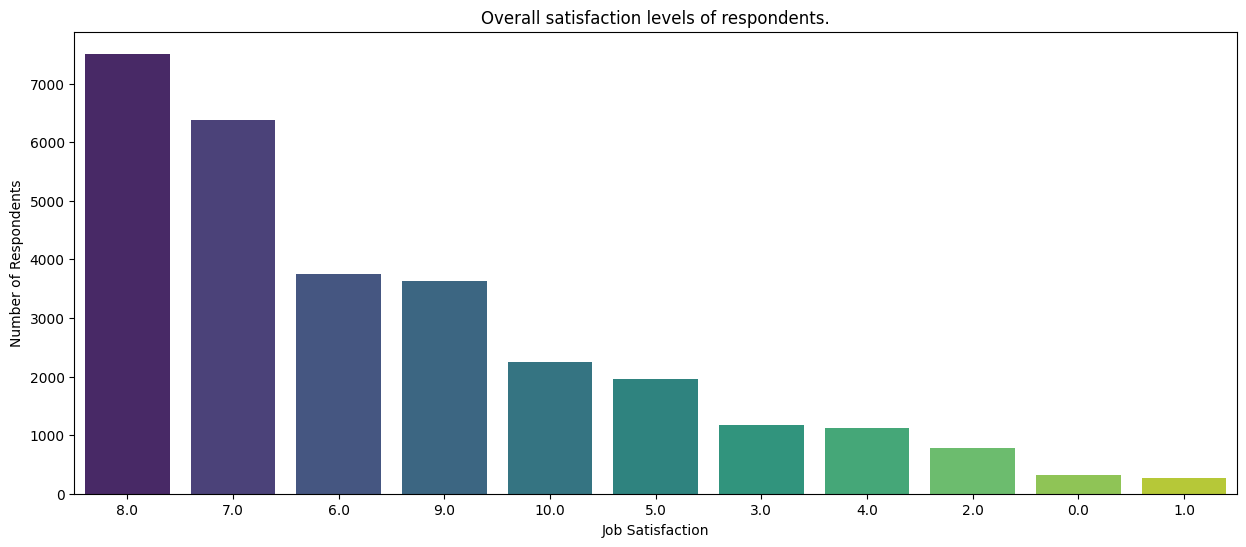

In [9]:
## Write your code here
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, palette='viridis')

plt.title('Overall satisfaction levels of respondents.')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


C:\Users\HP\AppData\Local\Temp\ipykernel_20496\919392616.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='viridis')


Text(0, 0.5, 'Number of Respondents')

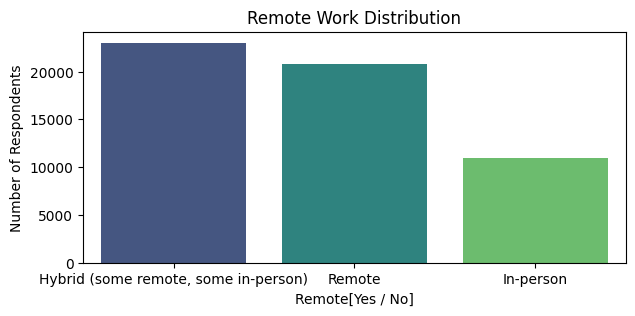

In [11]:
## Write your code here
# Count plot of remote work distribution
plt.figure(figsize=(7,3))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='viridis')
plt.title('Remote Work Distribution')
plt.xlabel('Remote[Yes / No]')
plt.ylabel('Number of Respondents')

In [15]:
# Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.
# Cross-tabulate RemoteWork vs Employment
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index')*100
remote_by_employment_df =  remote_by_employment.round(2).reset_index()

# Cross-tabulate RemoteWork vs Job Role (assuming column is named 'DevType' or similar)
remote_by_role = pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index')*100
remote_by_role_df = remote_by_role.round(2).reset_index()

In [16]:
remote_by_employment_df.head(10)

RemoteWork,Employment,"Hybrid (some remote, some in-person)",In-person,Remote
0,"Employed, full-time",44.28,21.91,33.81
1,"Employed, full-time;Employed, part-time",40.09,15.09,44.81
2,"Employed, full-time;Independent contractor, fr...",37.39,10.29,52.32
3,"Employed, full-time;Independent contractor, fr...",43.48,9.24,47.28
4,"Employed, full-time;Independent contractor, fr...",0.00,100.00,0.00
5,"Employed, full-time;Independent contractor, fr...",0.00,100.00,0.00
6,"Employed, full-time;Independent contractor, fr...",0.00,0.00,100.00
7,"Employed, full-time;Independent contractor, fr...",0.00,100.00,0.00
8,"Employed, full-time;Independent contractor, fr...",0.00,100.00,0.00
9,"Employed, full-time;Independent contractor, fr...",43.17,14.39,42.45


In [17]:
remote_by_role_df.head(10)

RemoteWork,DevType,"Hybrid (some remote, some in-person)",In-person,Remote
0,Academic researcher,55.59,32.39,12.02
1,Blockchain,16.83,11.88,71.29
2,Cloud infrastructure engineer,44.98,8.57,46.46
3,Data engineer,48.51,12.83,38.66
4,Data or business analyst,48.10,25.95,25.95
5,Data scientist or machine learning specialist,52.75,16.50,30.74
6,Database administrator,40.76,27.39,31.85
7,Designer,40.88,17.52,41.61
8,DevOps specialist,51.55,10.52,37.94
9,Developer Advocate,29.29,9.09,61.62


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [18]:
## Write your code here
# filter data by country or region
df['LanguageHaveWorkedWith'].unique()

array([nan,
       'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript',
       'C#', ...,
       'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript',
       'C;C++;Go;Lua;Objective-C;Python;Rust;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript'],
      shape=(23865,), dtype=object)

In [20]:
df_clean  = df.dropna(subset=['Country', 'LanguageHaveWorkedWith']) # drop missing  language or country info
df_exploded = df_clean.assign(Language=df_clean['LanguageHaveWorkedWith'].str.split(';')).explode('Language') # split multiple language into individual entries

In [29]:
# count languages usage by country
language_counts = df_exploded.groupby(['Country', 'Language']).size().reset_index(name='Count')
language_counts

,Country,Language,Count
0,Afghanistan,Ada,9
1,Afghanistan,Apex,4
2,Afghanistan,Assembly,7
3,Afghanistan,Bash/Shell (all shells),14
4,Afghanistan,C,13
...,...,...,...
5514,Zimbabwe,Rust,4
5515,Zimbabwe,SQL,15
5516,Zimbabwe,TypeScript,11
5517,Zimbabwe,VBA,2


In [30]:
language_pivot = language_counts.pivot(index='Country', columns='Language', values='Count').fillna(0)
language_pivot

Language,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9.0,4.0,7.0,14.0,13.0,8.0,13.0,4.0,3.0,5.0,7.0,6.0,5.0,3.0,3.0,3.0,4.0,7.0,5.0,24.0,3.0,12.0,25.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,3.0,3.0,15.0,3.0,6.0,3.0,25.0,4.0,4.0,8.0,21.0,4.0,4.0,3.0,12.0,5.0,3.0,4.0,6.0
Albania,5.0,0.0,1.0,10.0,7.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,25.0,4.0,16.0,26.0,0.0,4.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,16.0,1.0,4.0,0.0,9.0,1.0,0.0,1.0,28.0,2.0,0.0,1.0,14.0,1.0,1.0,0.0,0.0
Algeria,3.0,1.0,7.0,9.0,14.0,14.0,9.0,0.0,0.0,1.0,14.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,52.0,0.0,13.0,53.0,2.0,7.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,20.0,1.0,7.0,1.0,37.0,1.0,0.0,3.0,35.0,0.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0
Andorra,1.0,0.0,0.0,4.0,3.0,6.0,4.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,5.0,7.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,1.0,8.0,1.0,0.0,2.0,8.0,0.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0
Angola,3.0,1.0,1.0,3.0,4.0,4.0,3.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.0,0.0,5.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,9.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",1.0,0.0,1.0,18.0,10.0,12.0,11.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,43.0,1.0,16.0,53.0,0.0,5.0,1.0,7.0,3.0,0.0,0.0,0.0,0.0,24.0,0.0,8.0,0.0,25.0,1.0,3.0,3.0,33.0,2.0,0.0,1.0,25.0,6.0,6.0,0.0,0.0
Viet Nam,0.0,0.0,21.0,70.0,71.0,88.0,109.0,1.0,1.0,1.0,22.0,1.0,3.0,0.0,0.0,0.0,8.0,38.0,9.0,159.0,2.0,126.0,205.0,0.0,29.0,1.0,17.0,15.0,4.0,1.0,1.0,10.0,53.0,2.0,35.0,1.0,137.0,9.0,12.0,25.0,145.0,5.0,3.0,15.0,122.0,14.0,6.0,0.0,3.0
Yemen,1.0,0.0,0.0,3.0,2.0,7.0,5.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,4.0,12.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,2.0,10.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,8.0,2.0,2.0,0.0,0.0


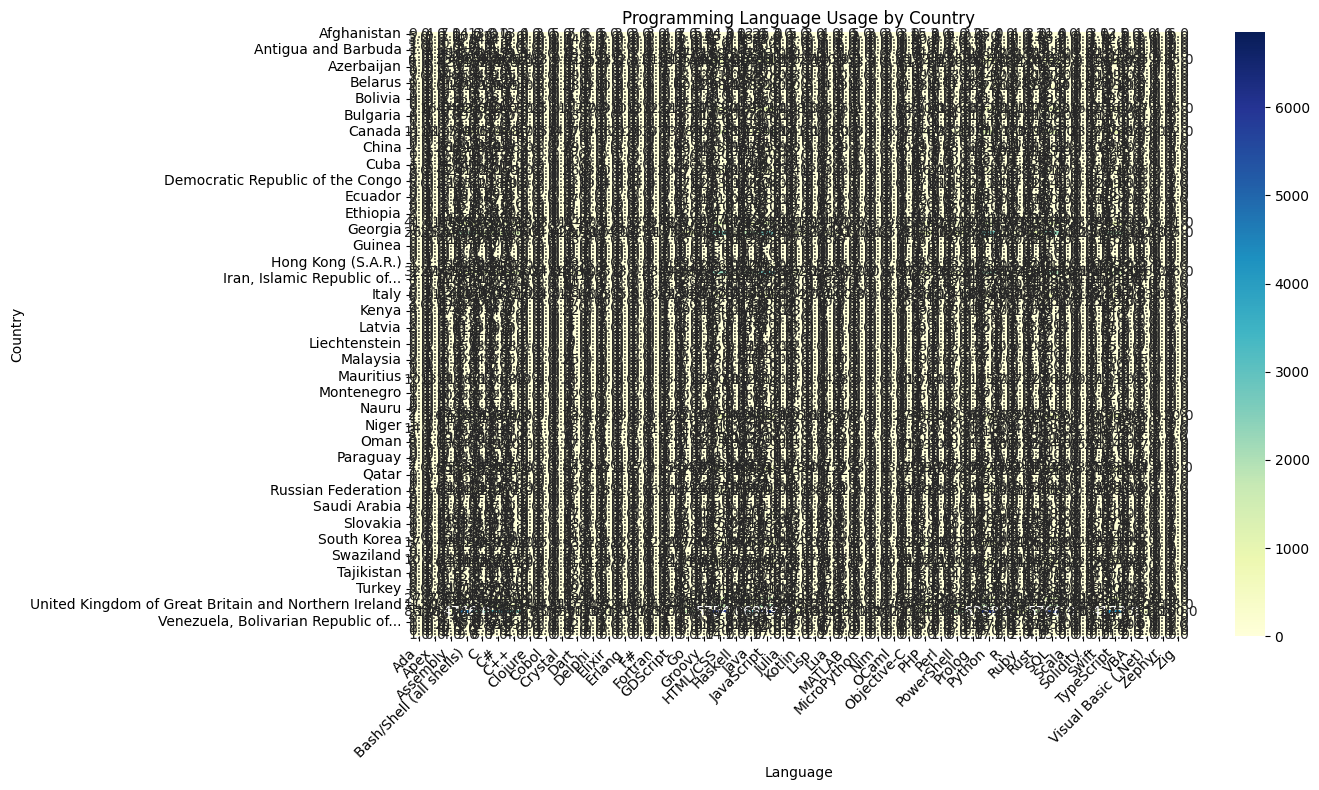

In [39]:
plt.figure(figsize=(14, 8))
sns.heatmap(language_pivot, cmap='YlGnBu', annot=True, fmt='.1f')
#
plt.title("Programming Language Usage by Country")
plt.xlabel("Language")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

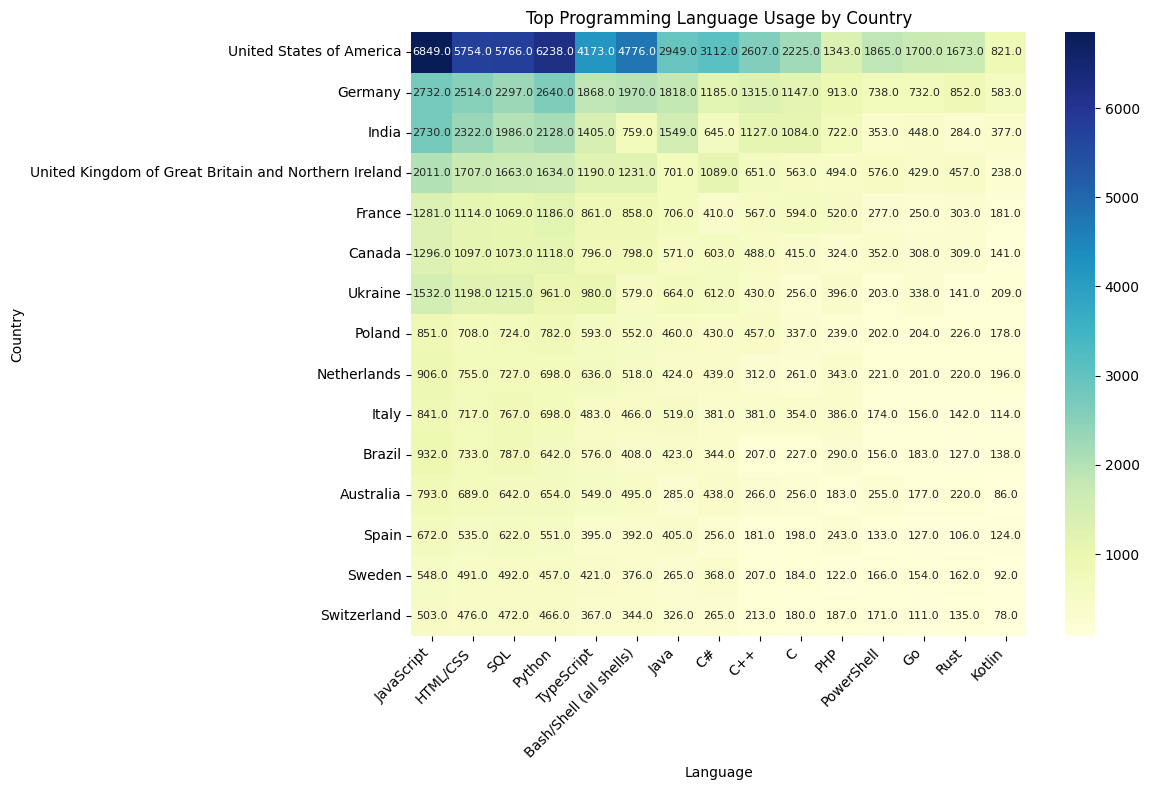

In [42]:
# above heatmap is very overwhelming
# Top 15 countries by total usage
top_countries = language_pivot.sum(axis=1).nlargest(15).index

# Top 15 languages by total usage
top_languages = language_pivot.sum(axis=0).nlargest(15).index

# Filter the table
filtered_table = language_pivot.loc[top_countries, top_languages]


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_table, cmap='YlGnBu', annot=True, fmt='.1f', annot_kws={"size": 8})

plt.title("Top Programming Language Usage by Country")
plt.xlabel("Language")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


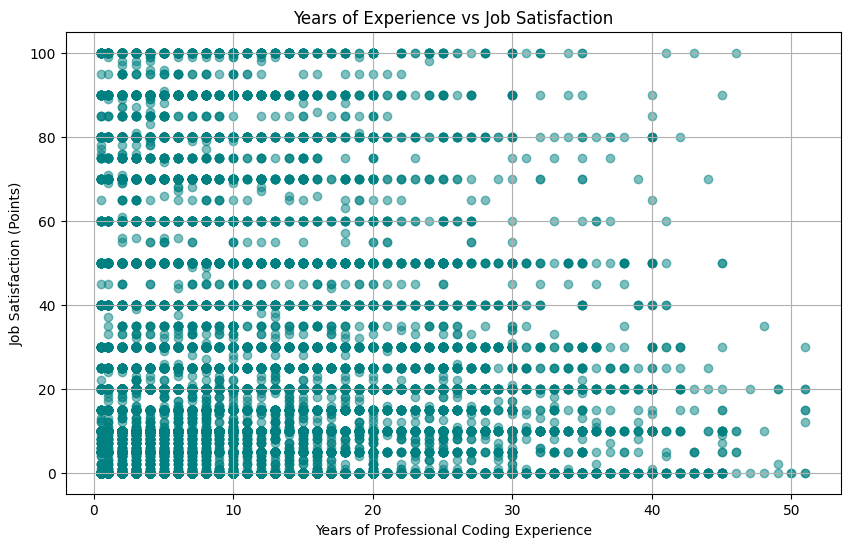

In [1]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Convert YearsCodePro to numeric (some values might be 'Less than 1 year' or 'More than 50 years')
def convert_years(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    else:
        try:
            return float(val)
        except:
            return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])


plt.figure(figsize=(10, 6))
plt.scatter(df_clean['YearsCodePro'], df_clean['JobSatPoints_1'], alpha=0.5, color='teal')
plt.title('Years of Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


C:\Users\HP\AppData\Local\Temp\ipykernel_17600\2303525001.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


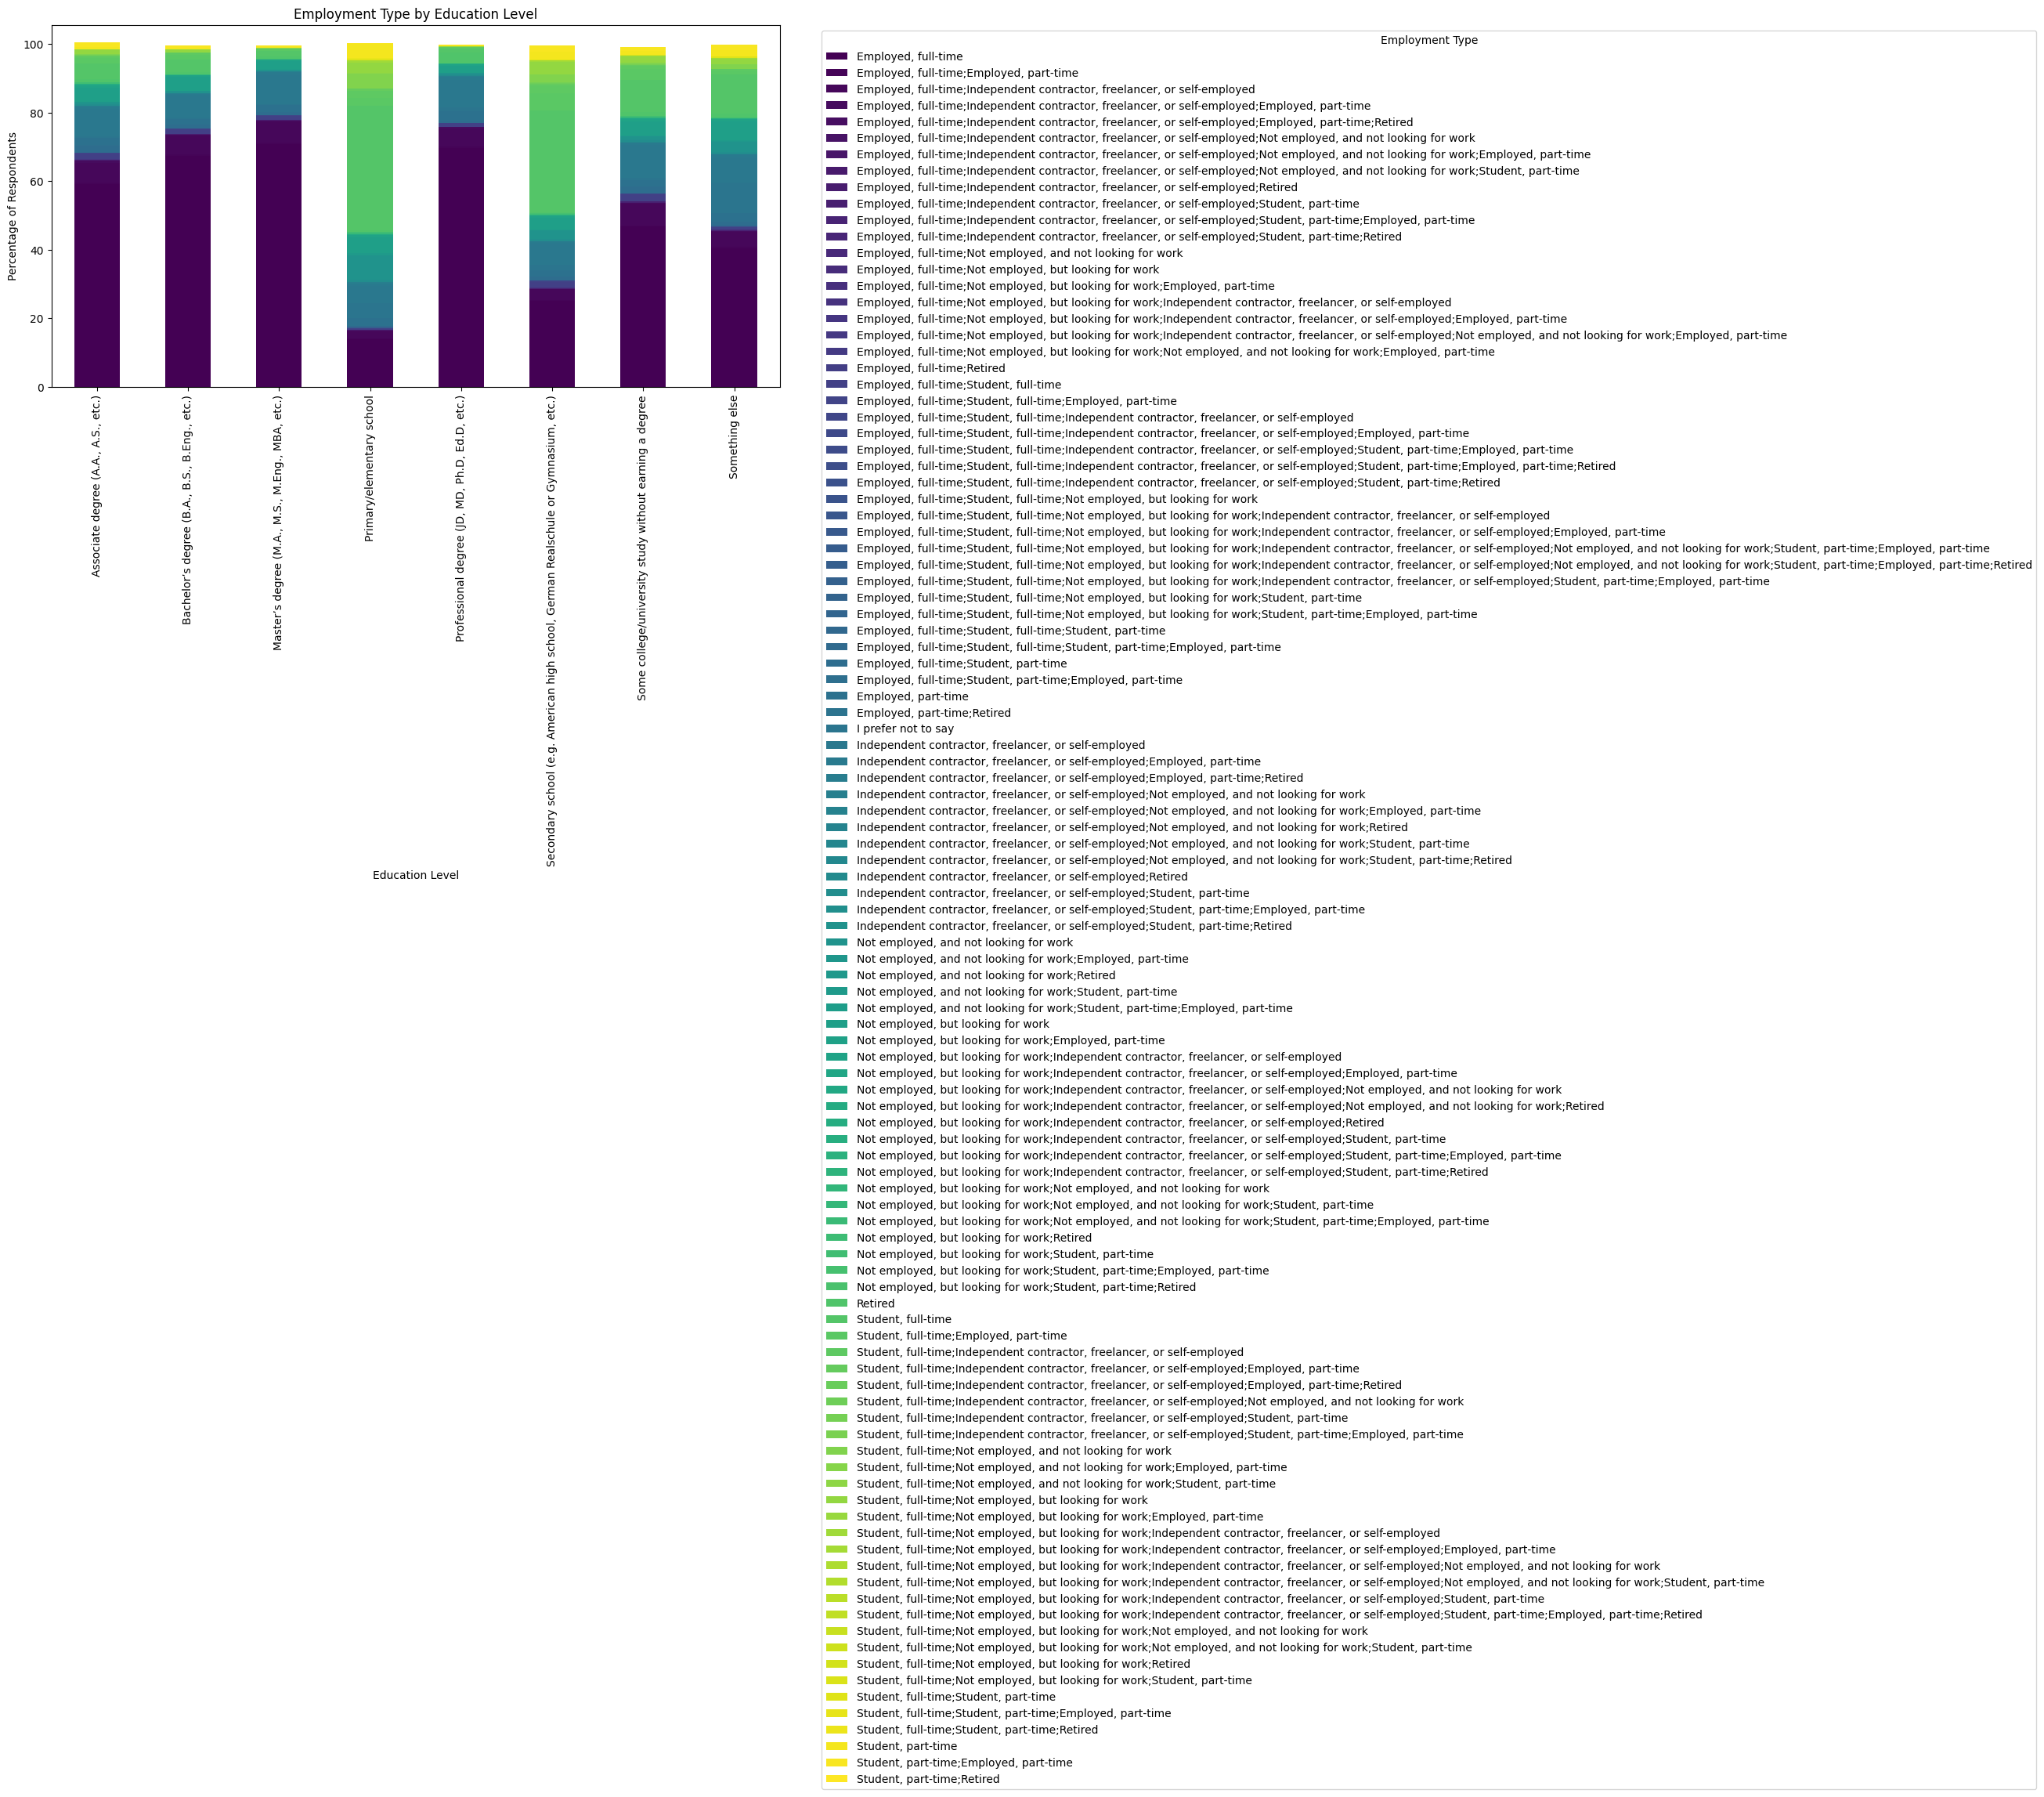

In [2]:
## Write your code here
# Select relevant columns and drop missing values
df_clean = df[['EdLevel', 'Employment']].dropna()

# Create a cross-tabulation
edu_emp_ct = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'], normalize='index') * 100
edu_emp_ct = edu_emp_ct.round(1)

# Plot stacked bar chart
edu_emp_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
